# Environment

In [1]:
import numpy as np
from typing import Tuple
from torch import Tensor
from torchaudio import load
import matplotlib.pyplot as plt
from IPython.display import Audio
import torchaudio.functional as F
from helpers.path_utils import get_base_dir
from helpers.plot import plot_wavelet_spectrogram

# Functions

In [2]:
def generate_synthetic_wave(frequency: int, secs_duration: int, sample_rate: int=4000) -> Tuple[Tensor, int]:
    t = np.linspace(0, secs_duration, int(sample_rate * secs_duration), endpoint=False)
    wave = 0.5 * np.sin(2 * np.pi * frequency * t)
    return Tensor(wave), sample_rate

def get_positive_freq_and_magn(audio: np.array, sample_rate: int) -> Tuple[np.array, np.array]:
    fft_result = np.fft.fft(audio)
    fft_magnitude = np.abs(fft_result)
    frequencies = np.fft.fftfreq(len(fft_result), 1/sample_rate)
    
    # Filtrar solo las frecuencias positivas
    positive_frequencies = frequencies[frequencies >= 0]
    positive_fft_magnitude = fft_magnitude[:len(positive_frequencies)]

    return positive_frequencies, positive_fft_magnitude

def apply_bandpass_filter(waveform, sample_rate, low_freq, high_freq):
    central_freq = (low_freq + high_freq) / 2
    bandwidth = high_freq - low_freq
    Q = central_freq / bandwidth

    filtered_waveform = F.bandpass_biquad(waveform, sample_rate, central_freq, Q)
    return filtered_waveform

def plot_audio_fft(positive_frequencies: np.array, positive_fft_magnitude: np.array) -> None:
    plt.figure(figsize=(12, 4))
    plt.plot(positive_frequencies, positive_fft_magnitude)
    plt.title('Distribución de Frecuencias')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')
    plt.grid()
    plt.show()

# Synthetic audio

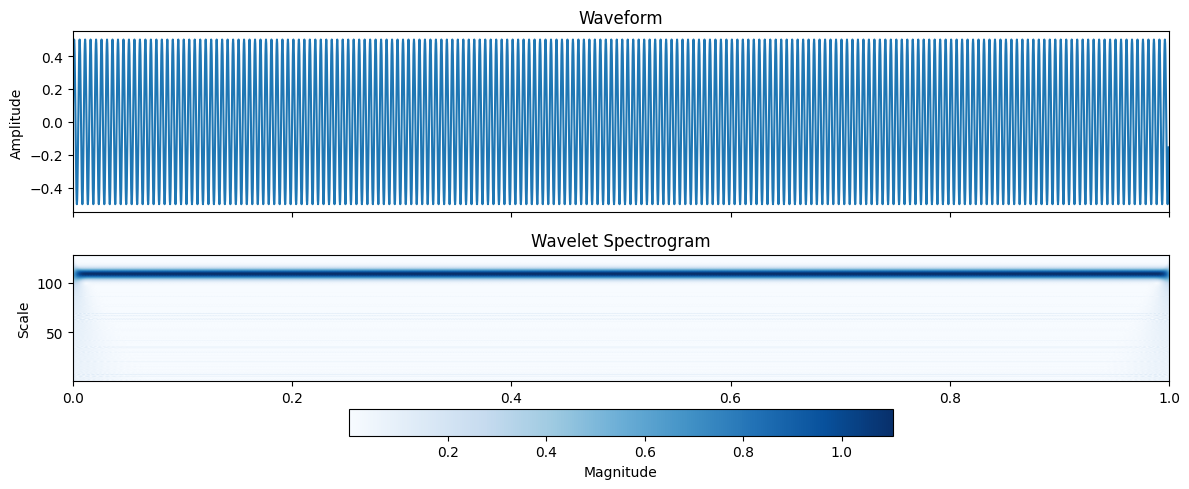

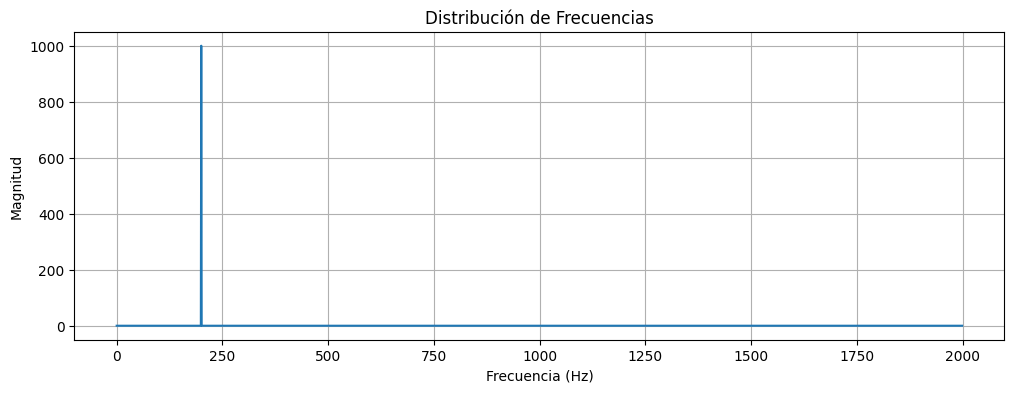

In [3]:
synthetic_audio, synthetic_sample_rate = generate_synthetic_wave(frequency=200, secs_duration=1)
plot_wavelet_spectrogram(synthetic_audio, synthetic_sample_rate, downsample_factor=1)

synth_freq, synth_magn = get_positive_freq_and_magn(synthetic_audio, synthetic_sample_rate)
plot_audio_fft(synth_freq, synth_magn)

Audio(synthetic_audio, rate=synthetic_sample_rate, autoplay=True)

# Heartbeat from digital stethoscope

In [6]:
AUDIO_NAME = "test-202406121506"

Sample rate:  4000


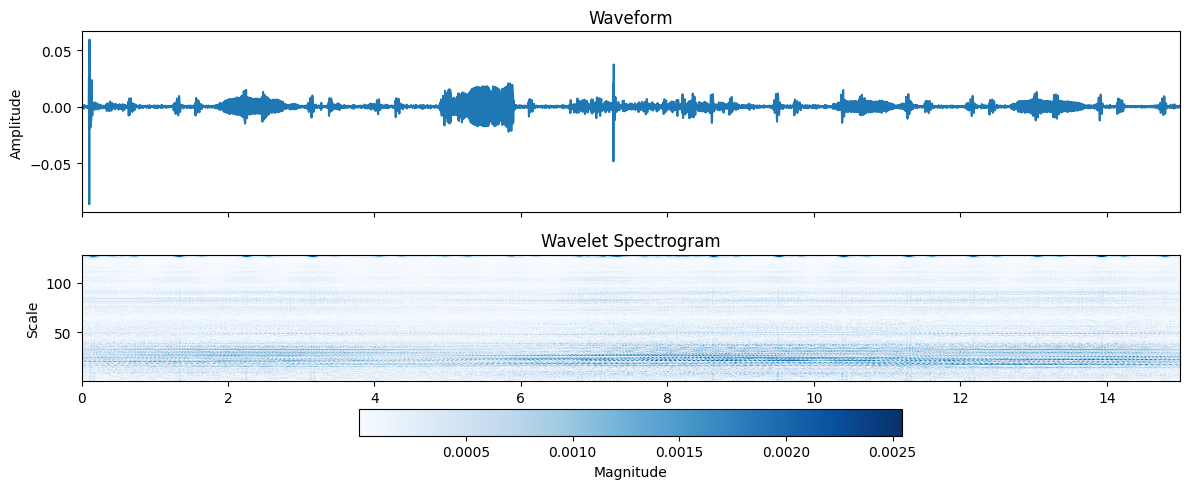

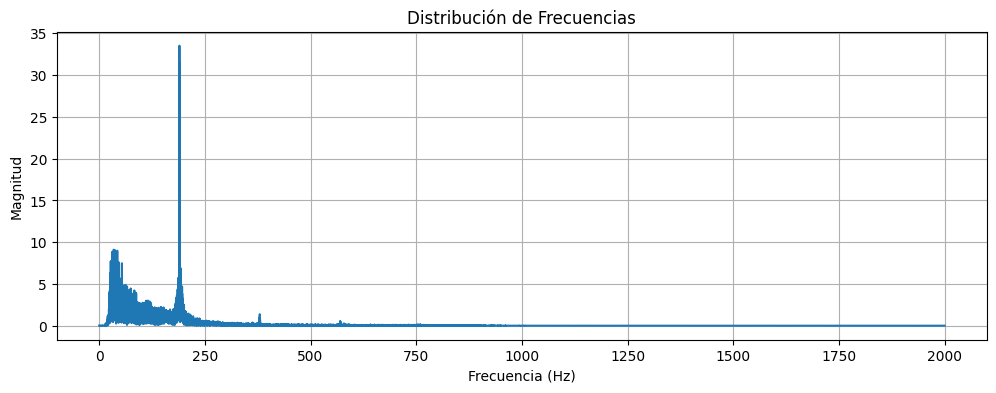

In [7]:
DIGITAL_AUDIO_DIR = get_base_dir().joinpath(f"data/digital/{AUDIO_NAME}.wav")

digital_audio, digital_sample_rate = load(DIGITAL_AUDIO_DIR)
print("Sample rate: ", digital_sample_rate)
plot_wavelet_spectrogram(digital_audio, digital_sample_rate)

digital_audio_freq, digital_audio_magn = get_positive_freq_and_magn(digital_audio.squeeze(), digital_sample_rate)
plot_audio_fft(digital_audio_freq, digital_audio_magn)

Audio(digital_audio, rate=digital_sample_rate, autoplay=True)

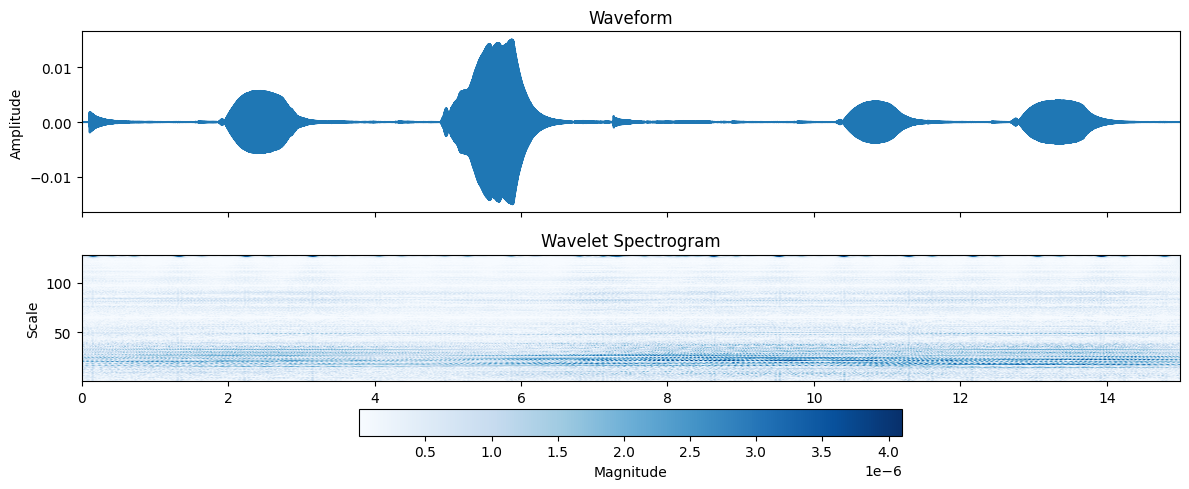

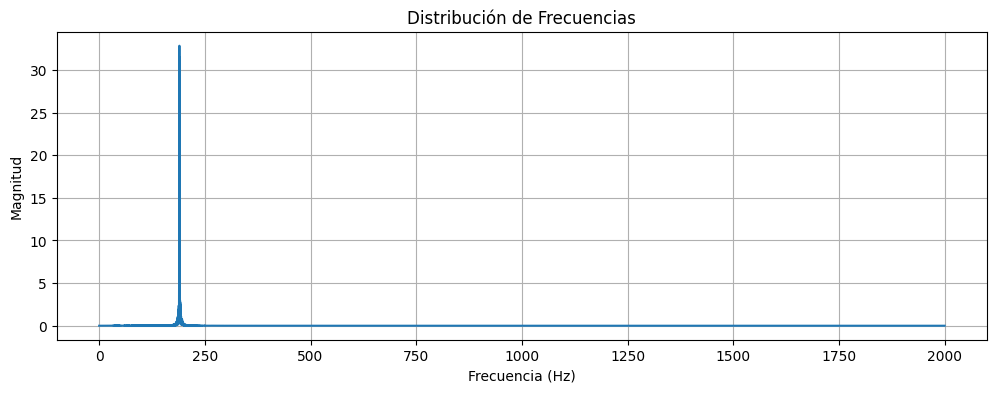

In [8]:
low_cutoff = 189
high_cutoff = 191

filtered_audio = apply_bandpass_filter(digital_audio, digital_sample_rate, low_cutoff, high_cutoff)
plot_wavelet_spectrogram(filtered_audio, digital_sample_rate)

filtered_freq, filtered_magn = get_positive_freq_and_magn(filtered_audio.squeeze(), digital_sample_rate)
plot_audio_fft(filtered_freq[:35000], filtered_magn[:35000])

Audio(filtered_audio, rate=digital_sample_rate, autoplay=True)